
# Loading data

In [66]:
import pandas as pd
df = pd.read_csv("anyanewsequence.csv", sep=',', dtype='str')
df

,sequence,gender,generation,education_type,locality,religion,how_often,partner,marriage,break,...,d_e,d_w,d_s,d_c,e_w,e_s,e_c,w_s,w_c,s_c
0,msecw,f,1,general,town,yes,sev_a_year,0,1,0,...,>,>,>,>,<,>,<,>,>,<
1,wmsce,f,1,professional,town,yes,sev_a_year,0,1,0,...,>,>,>,>,>,>,>,<,<,<
2,wsemc,f,0,higher,town,yes,sev_a_year,0,1,0,...,>,>,>,>,>,>,<,<,<,<
3,eswpcb,m,1,professional,town,yes,never,1,0,1,...,>,>,>,>,<,<,<,>,<,<
4,ewmsc,f,0,professional,town,yes,min_once_a_month,0,1,0,...,>,>,>,>,=,<,<,<,<,<
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6621,wemsc,m,0,professional,city,no,sev_a_week,0,1,0,...,>,>,>,>,>,<,<,<,<,<
6622,wepsmcb,m,0,general,village,yes,sev_a_year,1,1,1,...,>,>,>,>,>,<,<,<,<,<
6623,smcedpw,m,0,professional,city,yes,never,1,1,0,...,>,<,>,>,<,>,>,>,>,<
6624,wse,m,0,professional,village,yes,never,0,0,0,...,>,>,>,n,>,>,<,<,<,<


In [67]:
print(df.isna().sum()[df.isna().sum()>0])

Series([], dtype: int64)


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6626 entries, 0 to 6625
Data columns (total 43 columns):
sequence          6626 non-null object
gender            6626 non-null object
generation        6626 non-null object
education_type    6626 non-null object
locality          6626 non-null object
religion          6626 non-null object
how_often         6626 non-null object
partner           6626 non-null object
marriage          6626 non-null object
break             6626 non-null object
divorce           6626 non-null object
education         6626 non-null object
work              6626 non-null object
sep_from_par      6626 non-null object
child             6626 non-null object
p_m               6626 non-null object
p_b               6626 non-null object
p_d               6626 non-null object
p_e               6626 non-null object
p_w               6626 non-null object
p_s               6626 non-null object
p_c               6626 non-null object
m_b               6626 non-null obj

In [69]:
# Transforming all the values 

In [70]:
cat_cols = df.select_dtypes(['category']).columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.cat.codes)
df.head()

,sequence,gender,generation,education_type,locality,religion,how_often,partner,marriage,break,...,d_e,d_w,d_s,d_c,e_w,e_s,e_c,w_s,w_c,s_c
0,msecw,f,1,general,town,yes,sev_a_year,0,1,0,...,>,>,>,>,<,>,<,>,>,<
1,wmsce,f,1,professional,town,yes,sev_a_year,0,1,0,...,>,>,>,>,>,>,>,<,<,<
2,wsemc,f,0,higher,town,yes,sev_a_year,0,1,0,...,>,>,>,>,>,>,<,<,<,<
3,eswpcb,m,1,professional,town,yes,never,1,0,1,...,>,>,>,>,<,<,<,>,<,<
4,ewmsc,f,0,professional,town,yes,min_once_a_month,0,1,0,...,>,>,>,>,=,<,<,<,<,<


In [71]:
df.shape
df["sequence"].unique()

array(['msecw', 'wmsce', 'wsemc', ..., 'ewpbmsdc', 'wepcmbds', 'wmecsp'],
      dtype=object)

In [72]:
df.sequence = pd.Categorical(df.sequence,df["sequence"].unique(),ordered = True)
df.sequence = df.sequence.cat.codes
df.head()

,sequence,gender,generation,education_type,locality,religion,how_often,partner,marriage,break,...,d_e,d_w,d_s,d_c,e_w,e_s,e_c,w_s,w_c,s_c
0,0,f,1,general,town,yes,sev_a_year,0,1,0,...,>,>,>,>,<,>,<,>,>,<
1,1,f,1,professional,town,yes,sev_a_year,0,1,0,...,>,>,>,>,>,>,>,<,<,<
2,2,f,0,higher,town,yes,sev_a_year,0,1,0,...,>,>,>,>,>,>,<,<,<,<
3,3,m,1,professional,town,yes,never,1,0,1,...,>,>,>,>,<,<,<,>,<,<
4,4,f,0,professional,town,yes,min_once_a_month,0,1,0,...,>,>,>,>,=,<,<,<,<,<


In [73]:
df["how_often"].unique()

array(['sev_a_year', 'never', 'min_once_a_month', 'once_a_week',
       'sev_a_week'], dtype=object)

In [74]:
df.how_often

0             sev_a_year
1             sev_a_year
2             sev_a_year
3                  never
4       min_once_a_month
              ...       
6621          sev_a_week
6622          sev_a_year
6623               never
6624               never
6625               never
Name: how_often, Length: 6626, dtype: object

In [75]:
df.education_type = pd.Categorical(df.education_type,df["education_type"].unique(),ordered = True)
df.education_type = df.education_type.cat.codes
df.locality = pd.Categorical(df.locality,df["locality"].unique(),ordered = True)
df.locality = df.locality.cat.codes
df.religion = pd.Categorical(df.religion,df["religion"].unique(),ordered = True)
df.religion = df.religion.cat.codes
#df.how_often = pd.Categorical(df.how_often,df["how_often"].unique(),ordered = True)
df.how_often=pd.Categorical(df.how_often,categories=['never', 'sev_a_year', 'min_once_a_month', 'once_a_week','sev_a_week'],ordered = True)
df.how_often.cat.codes
df.how_often = df.how_often.cat.codes
df.p_m = pd.Categorical(df.p_m,df["p_m"].unique(),ordered = True)
df.p_m = df.p_m.cat.codes
df.p_b = pd.Categorical(df.p_b,df["p_b"].unique(),ordered = True)
df.p_b = df.p_b.cat.codes
df.p_d = pd.Categorical(df.p_d,df["p_d"].unique(),ordered = True)
df.p_d = df.p_d.cat.codes



        
        
df.p_e = pd.Categorical(df.p_e,df["p_e"].unique(),ordered = True)
df.p_e = df.p_e.cat.codes
df.p_w = pd.Categorical(df.p_w,df["p_w"].unique(),ordered = True)
df.p_w = df.p_w.cat.codes
df.p_s = pd.Categorical(df.p_s,df["p_s"].unique(),ordered = True)
df.p_s = df.p_s.cat.codes
df.p_c = pd.Categorical(df.p_c,df["p_c"].unique(),ordered = True)
df.p_c = df.p_c.cat.codes
df.m_b = pd.Categorical(df.m_b,df["m_b"].unique(),ordered = True)
df.m_b = df.m_b.cat.codes

df.m_d = pd.Categorical(df.m_d,df["m_d"].unique(),ordered = True)
df.m_d = df.m_d.cat.codes

df.m_e = pd.Categorical(df.m_e,df["m_e"].unique(),ordered = True)
df.m_e = df.m_e.cat.codes
df.m_w = pd.Categorical(df.m_w,df["m_w"].unique(),ordered = True)
df.m_w = df.m_w.cat.codes
df.m_s = pd.Categorical(df.m_s,df["m_s"].unique(),ordered = True)
df.m_s = df.m_s.cat.codes
df.m_c = pd.Categorical(df.m_c,df["m_c"].unique(),ordered = True)
df.m_c = df.m_c.cat.codes
df.b_d = pd.Categorical(df.b_d,df["b_d"].unique(),ordered = True)
df.b_d = df.b_d.cat.codes
df.b_e = pd.Categorical(df.b_e,df["b_e"].unique(),ordered = True)
df.b_e = df.b_e.cat.codes
df.b_w = pd.Categorical(df.b_w,df["b_w"].unique(),ordered = True)
df.b_w = df.b_w.cat.codes
df.b_s = pd.Categorical(df.b_s,df["b_s"].unique(),ordered = True)
df.b_s = df.b_s.cat.codes
df.b_c = pd.Categorical(df.b_c,df["b_c"].unique(),ordered = True)
df.b_c = df.b_c.cat.codes
df.d_e = pd.Categorical(df.d_e,df["d_e"].unique(),ordered = True)
df.d_e = df.d_e.cat.codes
df.d_w = pd.Categorical(df.d_w,df["d_w"].unique(),ordered = True)
df.d_w = df.d_w.cat.codes
df.d_s = pd.Categorical(df.d_s,df["d_s"].unique(),ordered = True)
df.d_s = df.d_s.cat.codes
df.d_c = pd.Categorical(df.d_c,df["d_c"].unique(),ordered = True)
df.d_c = df.d_c.cat.codes



df.e_w = pd.Categorical(df.e_w,df["e_w"].unique(),ordered = True)
df.e_w = df.e_w.cat.codes
df.e_s = pd.Categorical(df.e_s,df["e_s"].unique(),ordered = True)
df.e_s = df.e_s.cat.codes
df.e_c = pd.Categorical(df.e_c,df["e_c"].unique(),ordered = True)
df.e_c = df.e_c.cat.codes
df.w_s = pd.Categorical(df.w_s,df["w_s"].unique(),ordered = True)
df.w_s = df.w_s.cat.codes
df.w_c = pd.Categorical(df.w_c,df["w_c"].unique(),ordered = True)
df.w_c = df.w_c.cat.codes
df.s_c = pd.Categorical(df.s_c,df["s_c"].unique(),ordered = True)
df.s_c = df.s_c.cat.codes
df.head()

,sequence,gender,generation,education_type,locality,religion,how_often,partner,marriage,break,...,d_e,d_w,d_s,d_c,e_w,e_s,e_c,w_s,w_c,s_c
0,0,f,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,f,1,1,0,0,1,0,1,0,...,0,0,0,0,1,0,1,1,1,0
2,2,f,0,2,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,1,0
3,3,m,1,1,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
4,4,f,0,1,0,0,2,0,1,0,...,0,0,0,0,2,1,0,1,1,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6626 entries, 0 to 6625
Data columns (total 43 columns):
sequence          6626 non-null int16
gender            6626 non-null object
generation        6626 non-null object
education_type    6626 non-null int8
locality          6626 non-null int8
religion          6626 non-null int8
how_often         6626 non-null int8
partner           6626 non-null object
marriage          6626 non-null object
break             6626 non-null object
divorce           6626 non-null object
education         6626 non-null object
work              6626 non-null object
sep_from_par      6626 non-null object
child             6626 non-null object
p_m               6626 non-null int8
p_b               6626 non-null int8
p_d               6626 non-null int8
p_e               6626 non-null int8
p_w               6626 non-null int8
p_s               6626 non-null int8
p_c               6626 non-null int8
m_b               6626 non-null int8
m_d               662

In [77]:
df.gender = pd.Categorical(df.gender,df["gender"].unique(),ordered = True)
df.gender = df.gender.cat.codes
df.generation = pd.Categorical(df.generation,df["generation"].unique(),ordered = True)
df.generation = df.generation.cat.codes
df.partner = pd.Categorical(df.partner,df["partner"].unique(),ordered = True)
df.partner = df.partner.cat.codes
df.marriage = pd.Categorical(df.marriage,df["marriage"].unique(),ordered = True)
df.marriage = df.marriage.cat.codes
# df.break = pd.Categorical(df.break,df["break"].unique(),ordered = True)
# df.break = df.break.cat.codes
df.divorce = pd.Categorical(df.divorce,df["divorce"].unique(),ordered = True)
df.divorce = df.divorce.cat.codes
df.education = pd.Categorical(df.education,df["education"].unique(),ordered = True)
df.education = df.education.cat.codes
df.work = pd.Categorical(df.work,df["work"].unique(),ordered = True)
df.work = df.work.cat.codes
df.sep_from_par = pd.Categorical(df.sep_from_par,df["sep_from_par"].unique(),ordered = True)
df.sep_from_par = df.sep_from_par.cat.codes
df.child = pd.Categorical(df.child,df["child"].unique(),ordered = True)
df.child = df.child.cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6626 entries, 0 to 6625
Data columns (total 43 columns):
sequence          6626 non-null int16
gender            6626 non-null int8
generation        6626 non-null int8
education_type    6626 non-null int8
locality          6626 non-null int8
religion          6626 non-null int8
how_often         6626 non-null int8
partner           6626 non-null int8
marriage          6626 non-null int8
break             6626 non-null object
divorce           6626 non-null int8
education         6626 non-null int8
work              6626 non-null int8
sep_from_par      6626 non-null int8
child             6626 non-null int8
p_m               6626 non-null int8
p_b               6626 non-null int8
p_d               6626 non-null int8
p_e               6626 non-null int8
p_w               6626 non-null int8
p_s               6626 non-null int8
p_c               6626 non-null int8
m_b               6626 non-null int8
m_d               6626 non-null int8
m_

In [78]:
df

,sequence,gender,generation,education_type,locality,religion,how_often,partner,marriage,break,...,d_e,d_w,d_s,d_c,e_w,e_s,e_c,w_s,w_c,s_c
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,1,1,0
2,2,0,1,2,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,3,1,0,1,0,0,0,1,1,1,...,0,0,0,0,0,1,0,0,1,0
4,4,0,1,1,0,0,2,0,0,0,...,0,0,0,0,2,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6621,63,1,1,1,2,1,4,0,0,0,...,0,0,0,0,1,1,0,1,1,0
6622,264,1,1,0,1,0,1,1,0,1,...,0,0,0,0,1,1,0,1,1,0
6623,455,1,1,1,2,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
6624,104,1,1,1,1,0,0,0,1,0,...,0,0,0,2,1,0,0,1,1,0


In [79]:
df["break"] = pd.to_numeric(df["break"], errors='coerce')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6626 entries, 0 to 6625
Data columns (total 43 columns):
sequence          6626 non-null int16
gender            6626 non-null int8
generation        6626 non-null int8
education_type    6626 non-null int8
locality          6626 non-null int8
religion          6626 non-null int8
how_often         6626 non-null int8
partner           6626 non-null int8
marriage          6626 non-null int8
break             6626 non-null int64
divorce           6626 non-null int8
education         6626 non-null int8
work              6626 non-null int8
sep_from_par      6626 non-null int8
child             6626 non-null int8
p_m               6626 non-null int8
p_b               6626 non-null int8
p_d               6626 non-null int8
p_e               6626 non-null int8
p_w               6626 non-null int8
p_s               6626 non-null int8
p_c               6626 non-null int8
m_b               6626 non-null int8
m_d               6626 non-null int8
m_e

In [81]:
df

,sequence,gender,generation,education_type,locality,religion,how_often,partner,marriage,break,...,d_e,d_w,d_s,d_c,e_w,e_s,e_c,w_s,w_c,s_c
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,1,1,0
2,2,0,1,2,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,3,1,0,1,0,0,0,1,1,1,...,0,0,0,0,0,1,0,0,1,0
4,4,0,1,1,0,0,2,0,0,0,...,0,0,0,0,2,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6621,63,1,1,1,2,1,4,0,0,0,...,0,0,0,0,1,1,0,1,1,0
6622,264,1,1,0,1,0,1,1,0,1,...,0,0,0,0,1,1,0,1,1,0
6623,455,1,1,1,2,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
6624,104,1,1,1,1,0,0,0,1,0,...,0,0,0,2,1,0,0,1,1,0


# Making prediction by XGBoost and explaining it.

In [82]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model
data = df.copy()
y = data["gender"]
X = data.drop(["gender"], axis=1)
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[5,:], X.iloc[5,:])

In [83]:
y[5]

1

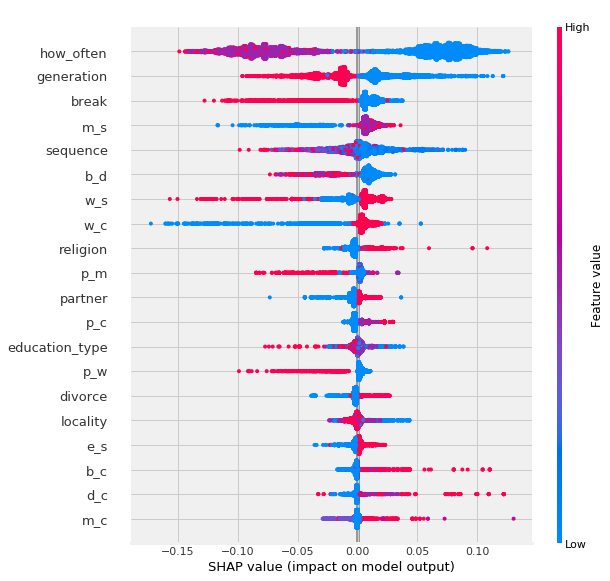

In [84]:
shap.summary_plot(shap_values, X)

In [85]:
data = df.copy()
y = data["gender"]
X = data.drop(["gender"], axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((4638, 42), (1988, 42))

In [86]:
X_train.head(3)

,sequence,generation,education_type,locality,religion,how_often,partner,marriage,break,divorce,...,d_e,d_w,d_s,d_c,e_w,e_s,e_c,w_s,w_c,s_c
6431,2,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3209,921,1,0,2,0,0,1,0,1,0,...,0,0,0,0,1,1,0,1,1,0
5756,222,1,1,1,1,0,1,0,1,1,...,0,0,0,0,1,0,0,0,1,0


In [87]:
import pandas as pd
import numpy as np
import model_evaluation_utils as meu
import matplotlib.pyplot as plt
from collections import Counter
import shap
import eli5

import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

shap.initjs()

In [88]:
import xgboost as xgb

xgc = xgb.XGBClassifier(n_estimators=500, max_depth=5, base_score=0.5,
                        objective='binary:logistic', random_state=42)
xgc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=500, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [89]:
predictions = xgc.predict(X_test)
predictions[:10]

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1], dtype=int8)

In [90]:
class_labels = list(set(y))
meu.display_model_performance_metrics(true_labels=y_test, predicted_labels=predictions, classes=class_labels)

Model Performance metrics:
------------------------------
Accuracy: 0.7404
Precision: 0.7441
Recall: 0.7404
F1 Score: 0.7401

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.78      0.69      0.73      1021
           1       0.71      0.79      0.75       967

   micro avg       0.74      0.74      0.74      1988
   macro avg       0.74      0.74      0.74      1988
weighted avg       0.74      0.74      0.74      1988


Prediction Confusion Matrix:
------------------------------
          Predicted:     
                   0    1
Actual: 0        709  312
        1        204  763


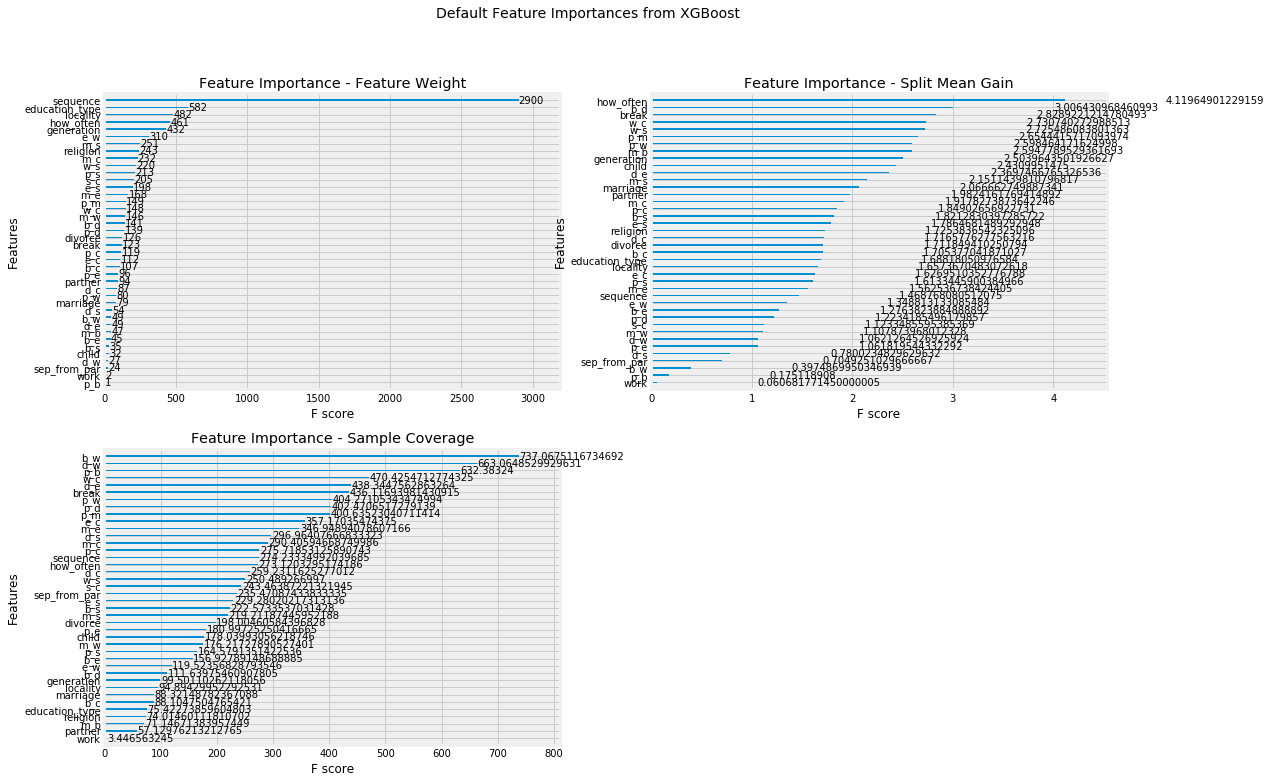

In [26]:
fig = plt.figure(figsize = (16, 12))
title = fig.suptitle("Default Feature Importances from XGBoost", fontsize=14)

ax1 = fig.add_subplot(2,2, 1)
xgb.plot_importance(xgc, importance_type='weight', ax=ax1)
t=ax1.set_title("Feature Importance - Feature Weight")

ax2 = fig.add_subplot(2,2, 2)
xgb.plot_importance(xgc, importance_type='gain', ax=ax2)
t=ax2.set_title("Feature Importance - Split Mean Gain")

ax3 = fig.add_subplot(2,2, 3)
xgb.plot_importance(xgc, importance_type='cover', ax=ax3)
t=ax3.set_title("Feature Importance - Sample Coverage")

In [95]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_validate
import matplotlib.pylab as pl
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt


In [96]:
xgbcl = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
         gamma=0.0, max_delta_step=0.0, min_child_weight=1.0,
         missing=None, n_jobs=-1, objective='binary:logistic', random_state=42, reg_alpha=0.0,
         reg_lambda=1.0, scale_pos_weight=1.0, tree_method='auto')

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

param_grid = { 
    'colsample_bytree':[.75,1],
    'learning_rate':[0.01,0.05,0.1,0.3,0.5],
    'max_depth':[1,2,3,5],
    'subsample':[.75,1],
    'n_estimators': list(range(50, 400, 50))
}

grid_search = GridSearchCV(estimator=xgbcl, scoring='roc_auc', param_grid=param_grid, n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

print(f'Best: {grid_result.best_score_} using {grid_result.best_params_}','\n')

Best: 0.7932495396388579 using {'colsample_bytree': 1, 'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 350, 'subsample': 0.75} 



In [97]:
#Set our final hyperparameters to the tuned values
xgbcl = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
         gamma=0.0, max_delta_step=0.0, min_child_weight=1.0,
         missing=None, n_jobs=-1, objective='binary:logistic', random_state=42, reg_alpha=0.0,
         reg_lambda=1.0, scale_pos_weight=1.0, tree_method='auto',
         colsample_bytree = grid_result.best_params_['colsample_bytree'], 
         learning_rate = grid_result.best_params_['learning_rate'], 
         max_depth = grid_result.best_params_['max_depth'], 
         subsample = grid_result.best_params_['subsample'], 
         n_estimators = grid_result.best_params_['n_estimators'])

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#refit the model on k-folds to get stable avg error metrics
scores = cross_validate(estimator=xgbcl, X=X_train, y=y_train, cv=kfold, n_jobs=-1, 
                        scoring=['accuracy', 'roc_auc', 'precision', 'recall', 'f1'])

print('Training 5-fold Cross Validation Results:\n')
print('AUC: ', scores['test_roc_auc'].mean())
print('Accuracy: ', scores['test_accuracy'].mean())
print('Precision: ', scores['test_precision'].mean())
print('Recall: ', scores['test_recall'].mean())
print('F1: ', scores['test_f1'].mean(), '\n')

Training 5-fold Cross Validation Results:

AUC:  0.8045122118918101
Accuracy:  0.7356608824020623
Precision:  0.7219857906258299
Recall:  0.7784294333802114
F1:  0.7489035310678618 



Classification report (Test): 

              precision    recall  f1-score   support

           0       0.78      0.70      0.74      1021
           1       0.71      0.79      0.75       967

   micro avg       0.74      0.74      0.74      1988
   macro avg       0.75      0.74      0.74      1988
weighted avg       0.75      0.74      0.74      1988

Confusion matrix (Test): 

[[0.36066398 0.15291751]
 [0.10362173 0.38279678]]

Train Accuracy: 0.9087968952134541
Test Accuracy: 0.7434607645875252

Train AUC: 0.9737017658807169
Test AUC: 0.8196087944276704


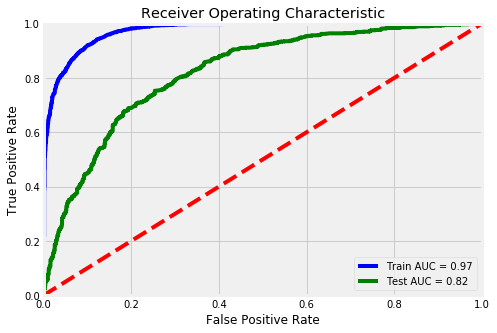

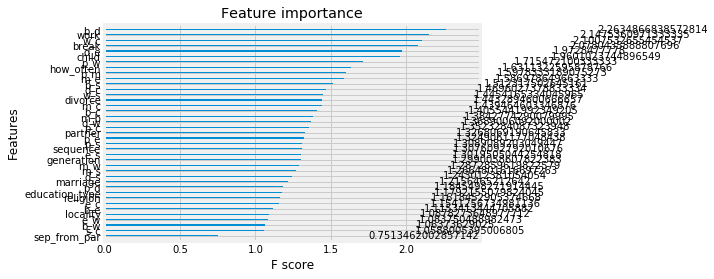

In [98]:
#Fit the final model
xgbcl.fit(X_train, y_train)

#Generate predictions against our training and test data
pred_train = xgbcl.predict(X_train)
proba_train = xgbcl.predict_proba(X_train)
pred_test = xgbcl.predict(X_test)
proba_test = xgbcl.predict_proba(X_test)

# Print model report
print("Classification report (Test): \n")
print(metrics.classification_report(y_test, pred_test))
print("Confusion matrix (Test): \n")
print(metrics.confusion_matrix(y_test, pred_test)/len(y_test))

print ('\nTrain Accuracy:', metrics.accuracy_score(y_train, pred_train))
print ('Test Accuracy:', metrics.accuracy_score(y_test, pred_test))

print ('\nTrain AUC:', metrics.roc_auc_score(y_train, proba_train[:,1]))
print ('Test AUC:', metrics.roc_auc_score(y_test, proba_test[:,1]))

# calculate the fpr and tpr for all thresholds of the classification
train_fpr, train_tpr, train_threshold = metrics.roc_curve(y_train, proba_train[:,1])
test_fpr, test_tpr, test_threshold = metrics.roc_curve(y_test, proba_test[:,1])

train_roc_auc = metrics.auc(train_fpr, train_tpr)
test_roc_auc = metrics.auc(test_fpr, test_tpr)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[7,5])
plt.title('Receiver Operating Characteristic')
plt.plot(train_fpr, train_tpr, 'b', label = 'Train AUC = %0.2f' % train_roc_auc)
plt.plot(test_fpr, test_tpr, 'g', label = 'Test AUC = %0.2f' % test_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# plot feature importance
xgb.plot_importance(xgbcl, importance_type='gain');

In [108]:
#take a random row of data
X_rand = X_test.sample(1, random_state = 55)
#display(titanic_orig.iloc[X_rand.index])

#generate a prediction for the row
rand_pred = xgbcl.predict(X_rand)
rand_proba = xgbcl.predict_proba(X_rand)

print(f'Predicted Probability (no, yes): {rand_proba}')
print(f'Predicted Survival (0 = no, 1 = yes): {rand_pred}','\n')
print(X.iloc[X_rand.index])
print(y[X_rand.index])

Predicted Probability (no, yes): [[0.26458806 0.73541194]]
Predicted Survival (0 = no, 1 = yes): [1] 

      sequence  generation  education_type  locality  religion  how_often  \
2887       104           1               1         1         0          0   

      partner  marriage  break  divorce  ...  d_e  d_w  d_s  d_c  e_w  e_s  \
2887        0         1      0        0  ...    0    0    0    2    1    0   

      e_c  w_s  w_c  s_c  
2887    0    1    1    0  

[1 rows x 42 columns]
2887    1
Name: gender, dtype: int8


In [109]:
import shap

explainer = shap.TreeExplainer(xgbcl, model_output='probability', feature_dependence='independent', data=X)
shap_values = explainer.shap_values(X.iloc[X_rand.index])
shap.initjs()
display(shap.force_plot(explainer.expected_value, shap_values, X.iloc[X_rand.index]))

#Display all features and SHAP values
display(pd.DataFrame(data=shap_values, columns=X.columns, index=[126]).transpose().sort_values(by=126, ascending=True))

,126
p_m,-0.284174
marriage,-0.121976
generation,-0.106497
locality,-0.082517
partner,-0.032520
d_c,-0.029264
m_s,-0.019405
religion,-0.019042
e_c,-0.016273
divorce,-0.009306


In [110]:
#Prove the sum of SHAP values and base_value sum to our prediction for class 1
import math
shap_sum = explainer.expected_value + explainer.shap_values(X_rand).sum()
print(shap_sum)
print(explainer.shap_values(X_rand).sum())
print(xgbcl.predict_proba(X_rand))
print(xgbcl.predict(X_rand))

assert(math.isclose(shap_sum,xgbcl.predict_proba(X_rand)[0][1],rel_tol=1e-03)) #if this was False, and error would be thrown

0.7353236800556132
0.22830907184653557
[[0.26458806 0.73541194]]
[1]


In [111]:
xgbcl.predict_proba(X_rand)[0][1]

0.73541194

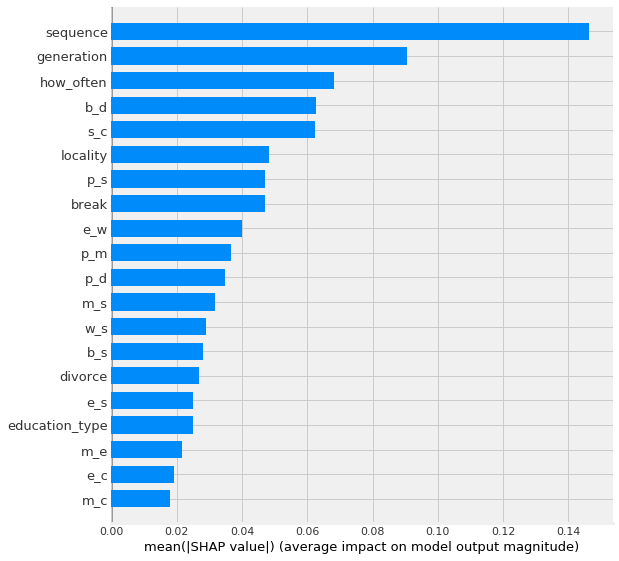

In [34]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [35]:
y

0       0
1       0
2       0
3       1
4       0
       ..
6621    1
6622    1
6623    1
6624    1
6625    1
Name: gender, Length: 6626, dtype: int8

In [36]:
#explainer.shap_values(X_test)

In [186]:
shap.force_plot(explainer.expected_value, explainer.shap_values(X_test.iloc[0:1]), X_test.iloc[0:1])

In [115]:
#Prove the sum of SHAP values and base_value sum to our prediction for class 1
import math
shap_sum = explainer.expected_value + explainer.shap_values(X_test.iloc[0:1]).sum()
print(shap_sum)
print(explainer.shap_values(X_test.iloc[0:1]).sum())
print(xgbcl.predict_proba(X_test.iloc[0:1]))
print(xgbcl.predict(X_test.iloc[0:1]))

#assert(math.isclose(shap_sum,rand_proba[0][1],rel_tol=1e-06)) #if this was False, and error would be thrown

0.0032375670145106117
-0.503777041194567
[[0.99674106 0.00325895]]
[0]


In [116]:
X_test.iloc[0:1]

,sequence,generation,education_type,locality,religion,how_often,partner,marriage,break,divorce,...,d_e,d_w,d_s,d_c,e_w,e_s,e_c,w_s,w_c,s_c
4552,1159,1,1,2,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [65]:
X.iloc[0:1]


,sequence,generation,education_type,locality,religion,how_often,partner,marriage,break,divorce,...,d_e,d_w,d_s,d_c,e_w,e_s,e_c,w_s,w_c,s_c
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


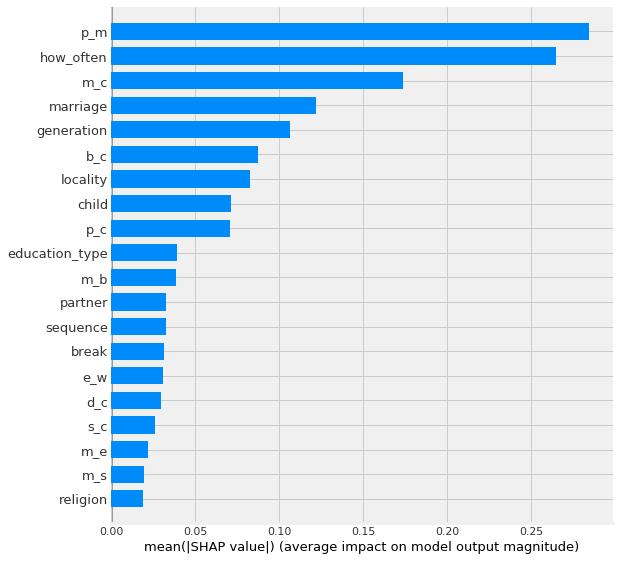

In [120]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

We consider test set only

TruePositives={men correctly predicted}

TrueNegatives={women correctly predicted}

FalsePositives={men incorrectly predicted as women}

FalseNegatives={women incorrecly predicted as men}

In [227]:
TruePositives=[]
TrueNegatives=[]
FalsePositives=[]
FalseNegatives=[]

for i in range(len(X_test)):
    if int(xgbcl.predict(X_test.iloc[i:i+1])[0])!=int(y_test.iloc[i:i+1]):
        if int(y_test.iloc[i:i+1])!=1:
                     FalsePositives.append(i)
        else: 
                     FalseNegatives.append(i)
    else:
        if int(y_test.iloc[i:i+1])==1:
                     TruePositives.append(i)
        else: 
                     TrueNegatives.append(i)

In [228]:
tp=len(TruePositives)
tn=len(TrueNegatives)
fp=len(FalsePositives)
fn=len(FalseNegatives)
print ("tp={},tn={},fp={},fn={}".format(tp,tn,fp,fn))

tp=761,tn=717,fp=304,fn=206


In [229]:
tp=len(TruePositives)
tn=len(TrueNegatives)
fp=len(FalsePositives)
fn=len(FalseNegatives)

TruePositive case

In [230]:
shap.force_plot(explainer.expected_value, explainer.shap_values(X_test.iloc[TruePositives[0]:TruePositives[0]+1]),X_test.iloc[TruePositives[0]:TruePositives[0]+1])            

In [231]:
xgbcl.predict(X_test.iloc[TruePositives[0]:TruePositives[0]+1])

array([1], dtype=int8)

TrueNegative case

In [233]:
shap.force_plot(explainer.expected_value, explainer.shap_values(X_test.iloc[TrueNegatives[0]:TrueNegatives[0]+1]),X_test.iloc[TrueNegatives[0]:TrueNegatives[0]+1])            

In [234]:
xgbcl.predict(X_test.iloc[TrueNegatives[0]:TrueNegatives[0]+1])

array([0], dtype=int8)

In [244]:
y_test.iloc[TrueNegatives[0]:TrueNegatives[0]+1]

4552    0
Name: gender, dtype: int8

In [236]:
X_test.iloc[TrueNegatives[0]:TrueNegatives[0]+1]

,sequence,generation,education_type,locality,religion,how_often,partner,marriage,break,divorce,...,d_e,d_w,d_s,d_c,e_w,e_s,e_c,w_s,w_c,s_c
4552,1159,1,1,2,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [239]:
df_original = pd.read_csv("anyanewsequence.csv", sep=',', dtype='str')

df_original.iloc[4552:4553]

,sequence,gender,generation,education_type,locality,religion,how_often,partner,marriage,break,...,d_e,d_w,d_s,d_c,e_w,e_s,e_c,w_s,w_c,s_c
4552,epsmcwb,f,0,professional,city,yes,sev_a_year,1,1,1,...,>,>,>,>,<,<,<,>,>,<


In [240]:
shap.force_plot(explainer.expected_value, explainer.shap_values(X_test.iloc[FalsePositives[0]:FalsePositives[0]+1]),X_test.iloc[FalsePositives[0]:FalsePositives[0]+1])            

In [242]:
y_test.iloc[FalsePositives[0]:FalsePositives[0]+1]

4443    0
Name: gender, dtype: int8

In [220]:
shap.force_plot(explainer.expected_value,explainer.shap_values(X_test.iloc[FalseNegatives[0]:FalseNegatives[0]+1]),X_test.iloc[FalseNegatives[0]:FalseNegatives[0]+1])

In [223]:
xgbcl.predict(X_test.iloc[FalseNegatives[0]:FalseNegatives[0]+1])

array([0], dtype=int8)

In [224]:
y_test.iloc[FalseNegatives[0]:FalseNegatives[0]+1]

3910    1
Name: gender, dtype: int8